In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Padding a 3D mesh

This notebook shows how to pad a 3D mesh. Note that padding a 3d mesh is done on the contour (before tetrahedralization).

### Generating some data

This cell generates a simple 3d volume.

(48, 120, 72)


<IPython.core.display.Javascript object>


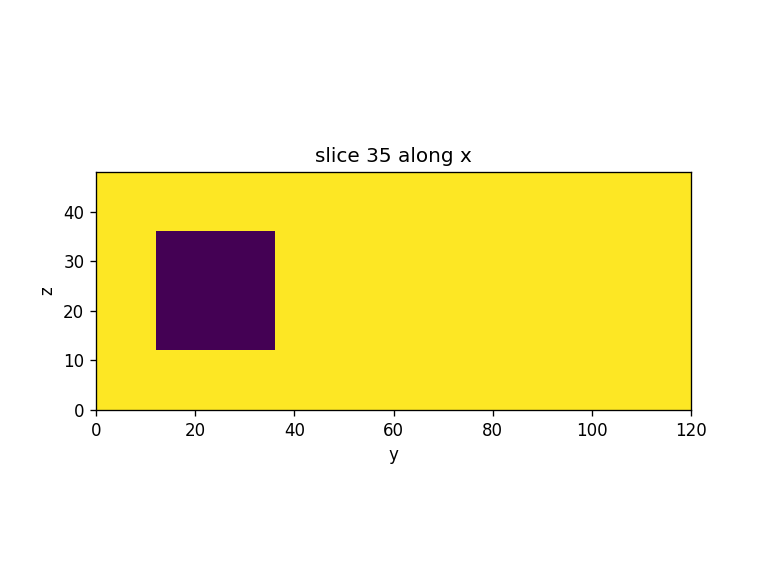

interactive(children=(IntSlider(value=35, description='index', max=71), RadioButtons(description='along', opti…

In [2]:
import numpy as np
from nanomesh import Volume

n = 24
m = 12

data = np.ones([2*n, 5*n, 3*n], dtype=int)
data[m:3*m, m:3*m, 0:3*n] = 0

print(data.shape)

vol = Volume(data)
vol.show_slice()

### Generating the contour

Generated contour with 14028 cells


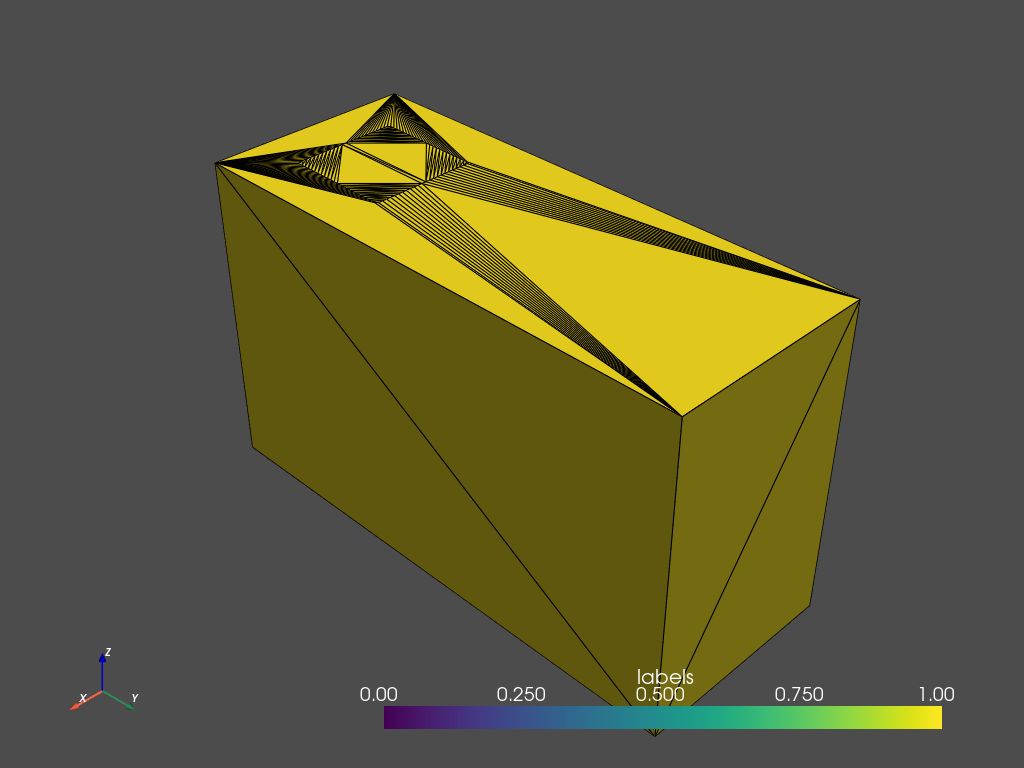

In [3]:
from nanomesh.mesh3d import Mesher3D

mesher = Mesher3D(vol)
mesher.generate_contour()
mesher.show_contour(jupyter_backend='static', show_edges=True)

### Padding different sides

The mesh can be padded using a similar API as 2d meshes. Each side (top/bottom, left/right, front/back) can be padded. A width must be specified. The label is optional.

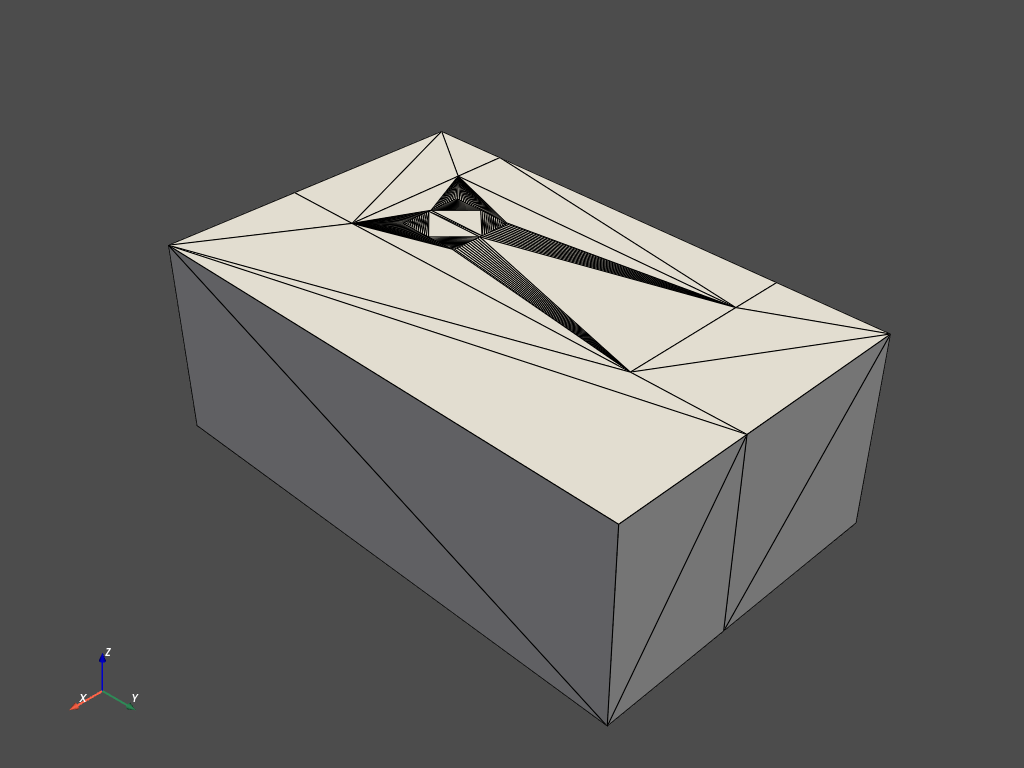

In [4]:
mesher.pad_contour(side='front', width=20, label=2)
mesher.pad_contour(side='left', width=30, label=3)
mesher.pad_contour(side='right', width=40, label=4)
mesher.pad_contour(side='back', width=50, label=5)
mesher.show_contour(jupyter_backend='static', show_edges=True)

### Generate tetrahedral mesh

Finally, generate the tetrahedral mesh.

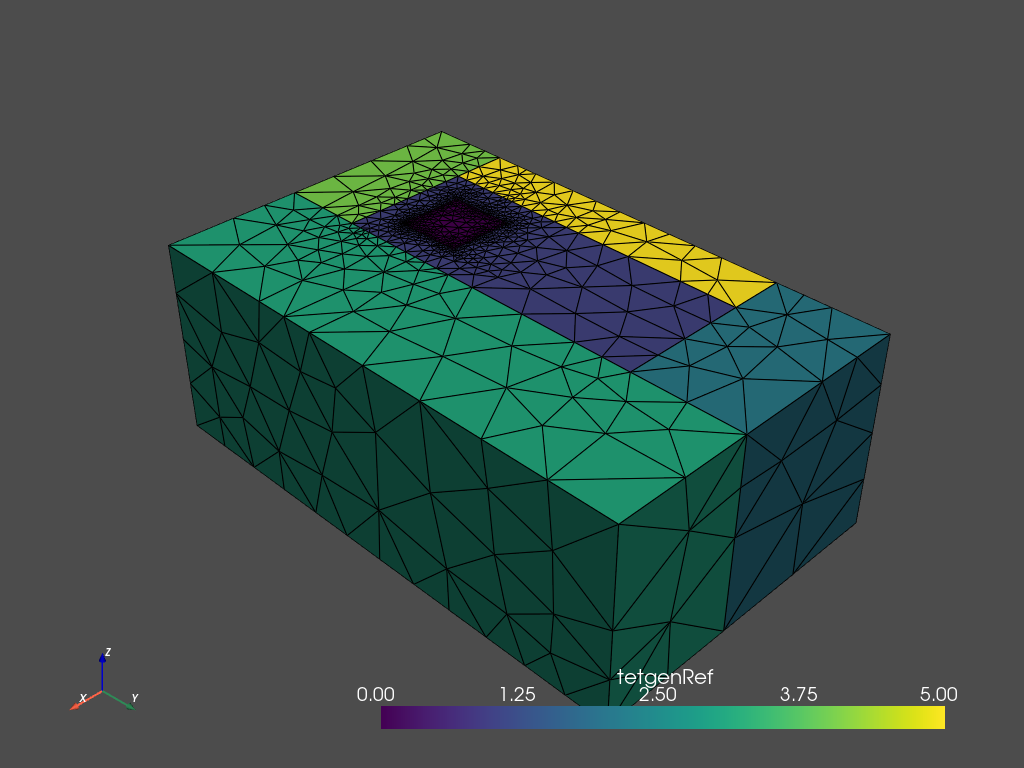

In [5]:
tetras = mesher.tetrahedralize(opts='-pAq1.2 -a10000', generate_region_markers=True)
tetras.plot_pyvista(jupyter_backend='static', show_edges=True)